#### AFML - Mat-Eig Test on Sample curves

In [2]:
import AFML_functions
from AFML_functions import *

In [34]:
from scipy.spatial import distance_matrix
 
def average_angle(array):
    # for each triplet of consecutive points, compute the angle
    angles = []
    for i in range(len(array)-2):
        p1 = array[i,:]
        p2 = array[i+1,:]
        p3 = array[i+2,:]
        v1 = p2 - p1
        v2 = p3 - p2
        angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        angles.append(angle)
    return angles



def distances(array):
    dist_matrix = distance_matrix(array, array)
    # get part above diagonal
    distances = dist_matrix[np.triu_indices(len(array), k=1)]
    return distances
 

def eigendecomposition(array):
    dist_matrix = distance_matrix(array, array)
    sigma = 0.3
    closeness_matrix = np.exp(-dist_matrix**2/(2*sigma**2))
    # compute the degree matrix
    degree_matrix = np.diag(np.sum(closeness_matrix, axis=1))
    # compute the laplacian matrix
    laplacian_matrix = degree_matrix - closeness_matrix
    # compute the eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    # sort the eigenvalues and eigenvectors to start with highest eigenvalue
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvalues, eigenvectors


In [31]:
x_grid = np.linspace(-2,2,100)

fn1 = lambda x : x ** 3
fn1_grid = fn1(x_grid)

fn2 = lambda x : x ** 2
fn2_grid = fn2(x_grid)

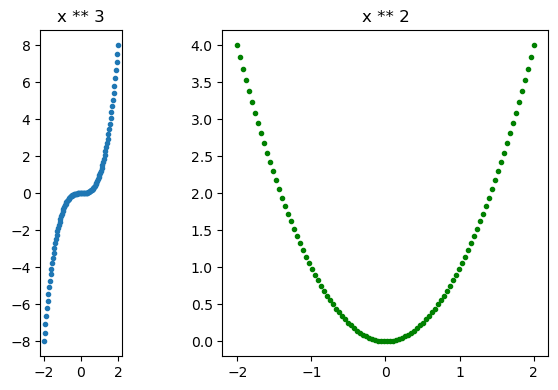

In [33]:
# Plotting both point clouds
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot square
ax[0].scatter(x_grid, fn1_grid, marker='.')
ax[0].set_title("x ** 3")
ax[0].set_aspect('equal', adjustable='box')

# Plot circle
ax[1].scatter(x_grid, fn2_grid, marker='.', c='green')
ax[1].set_title("x ** 2")
ax[1].set_aspect('equal', adjustable='box')

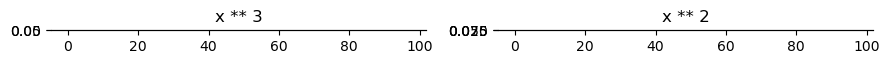

In [58]:
fn1_2d_grid = np.array([x_grid, fn1_grid]).transpose()
fn2_2d_grid = np.array([x_grid, fn2_grid]).transpose()

angles_fn1 = average_angle(fn1_2d_grid)
angles_fn2 = average_angle(fn2_2d_grid)

# Plotting both point clouds
fig, ax = plt.subplots(1,2, figsize=(9,9))

# Plot square
ax[0].plot(angles_fn1)
ax[0].set_title("x ** 3")
ax[0].set_aspect('equal', adjustable='box')

# Plot circle
ax[1].plot(angles_fn2)
ax[1].set_title("x ** 2")
ax[1].set_aspect('equal', adjustable='box')

